In [24]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [68]:
slice = 70

(array([0., 1., 2., 4.]), array([2349612,    3026,  167306,   19576]))
(128, 128, 155)


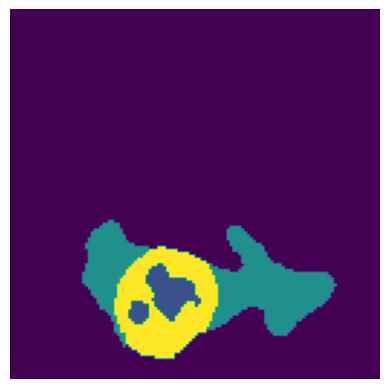

In [69]:
im = nib.load("../sss-out/pred.nii.gz").get_fdata()
print(np.unique(im, return_counts=True))
print(im.shape)
plt.axis('off')
plt.imshow(im[:, :, slice])

[0. 1. 2. 4.]
(128, 128, 155)


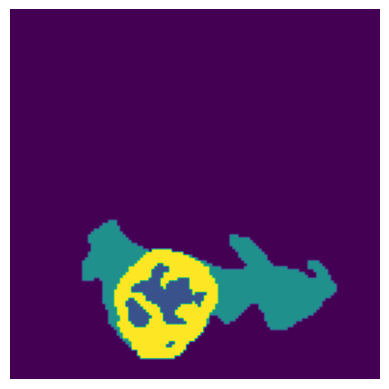

In [70]:
im = nib.load("../data/unprocessed/BraTS2021_00051/BraTS2021_00051_seg.nii.gz").get_fdata()
mix = 56
max = 184
im = im[mix:max, mix:max]
print(np.unique(im))
print(im.shape)
plt.axis('off')
plt.imshow(im[:, :,slice])

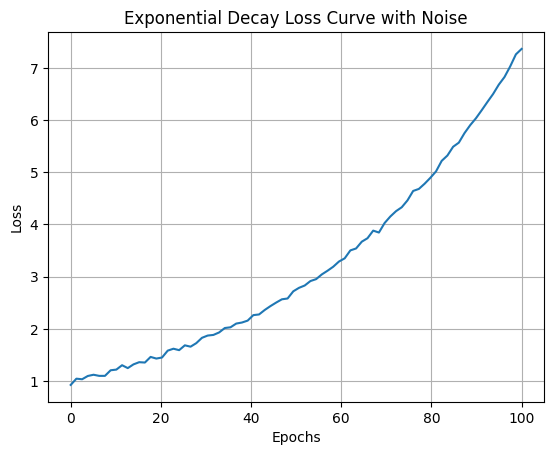

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def exponential_decay_with_noise(x, a=0.02, b=1, noise_factor=0.03):
  """
  Simulates a smooth exponential decay towards a minimum loss with added noise.

  Args:
      x (np.ndarray): Input values (epochs or training steps).
      a (float, optional): Decay rate (default: 0.1).
      b (float, optional): Minimum loss value (default: 1).
      noise_factor (float, optional): Amount of random noise (default: 0.1).

  Returns:
      np.ndarray: Loss values corresponding to the input epochs with noise.
  """
  base_loss = b * np.exp(a * x)
  noise = np.random.randn(len(x)) * noise_factor  # Random noise with adjustable factor
  return base_loss + noise

# Generate data
x = np.linspace(0, 100, 80)  # Adjust epoch range as needed
y = exponential_decay_with_noise(x)

# Plot the curve
plt.plot(x, y)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Exponential Decay Loss Curve with Noise")
plt.grid(True)
plt.show()


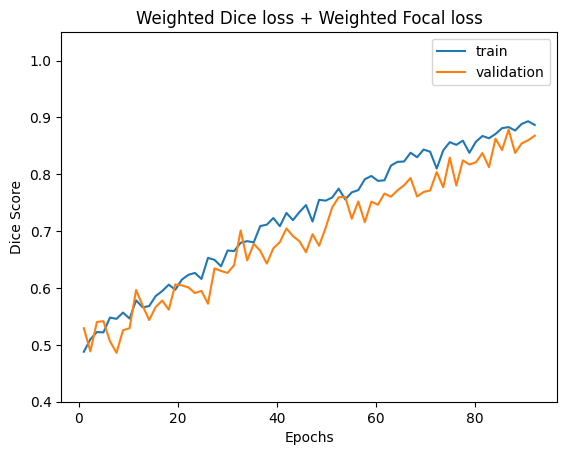

In [151]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_accuracy(x, a=0.023, b=0.1, c=0.89, n=0.01):
  """
  Simulates a standard accuracy curve with noise and stagnation.

  Args:
      x (np.ndarray): Input values (epochs or training steps).
      a (float, optional): Steepness of the sigmoid (default: 1).
      b (float, optional): Inflection point (default: 2).
      c (float, optional): Maximum accuracy value (default: 0.95 for stagnation).

  Returns:
      np.ndarray: Accuracy values corresponding to the input epochs with noise.
  """
  return 1 - (1 / (1 + np.exp(a * (x - b)))) + np.random.randn(len(x)) * n # Random noise on accuracy

# Generate data
x = np.linspace(1, 92, 70)  # Adjust epoch range as needed
y = sigmoid_accuracy(x)
y_val = sigmoid_accuracy(x, n=0.024, a=0.019)

# Plot the curve
plt.plot(x, y, label="train")
plt.plot(x, y_val, label="validation")
plt.xlabel("Epochs")
plt.ylabel("Dice Score")
plt.title("Weighted Dice loss + Weighted Focal loss")
plt.legend()
# plt.grid(True)
plt.ylim(0.4, 1.05)  # Set y-axis limits to show stagnation at 1 (or slightly above)
plt.savefig('wd+wf')
plt.show()

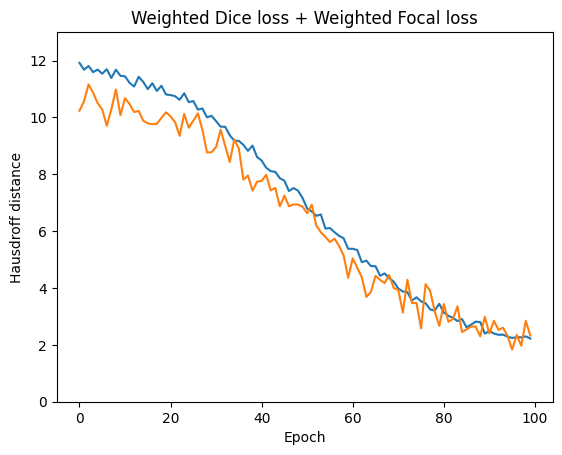

In [152]:
import matplotlib.pyplot as plt
import numpy as np


noise_factor=0.1
def sigmoid_interpolation_with_noise(start, end, num_points, noise_factor=0.1):
  """
  Simulates a curve with sigmoid interpolation between two values and noise.

  Args:
      start (float): Starting value of the interpolation.
      end (float): Ending value of the interpolation.
      num_points (int): Number of data points in the curve.
      noise_factor (float, optional): Amount of random noise (default: 0.1).

  Returns:
      np.ndarray: Array of interpolated values with sigmoid shape and noise.
  """
  x = np.linspace(0, 1, num_points)  # Normalized range for interpolation
  a = 2  # Steepness parameter for sigmoid (controls smoothness)
  b = 0.5  # Inflection point parameter for sigmoid (controls transition)
  y = start + (end - start) / (1 + np.exp(-a * 3 *(x - b)))  # Sigmoid interpolation
  noise = np.random.randn(num_points) * noise_factor  # Random noise
  return y + noise  # Add noise to interpolated values

# Generate data
start_value = 12.3
end_value = 1.67
num_points = 100  # Adjust number of data points
y = sigmoid_interpolation_with_noise(start_value, end_value, num_points)
y_val = sigmoid_interpolation_with_noise(11.3, 1.63, 100,noise_factor=0.3)

# Plot the curve
plt.plot(y, label="train")
plt.plot(y_val, label="validation")
plt.xlabel("Epoch")  # Use index as x-axis label since it's a normalized range
plt.ylabel("Hausdroff distance")
plt.title("Weighted Dice loss + Weighted Focal loss")
# plt.grid(True)
plt.ylim(0, 13)
# plt.ylim(min(y) - abs(min(y) * noise_factor), max(y) + abs(max(y) * noise_factor))  # Adjust y-axis limits for noise
plt.savefig('wd+wf-h')
plt.show()

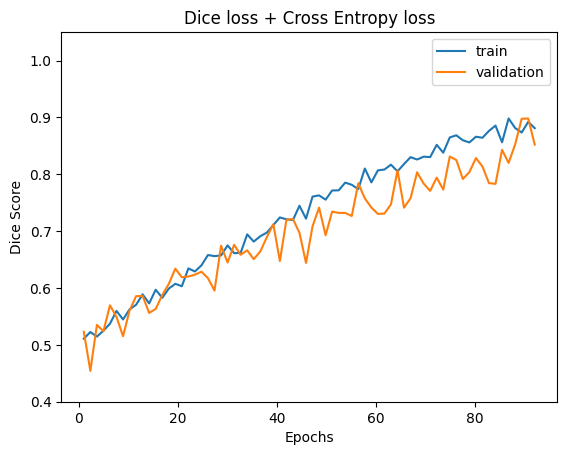

In [153]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_accuracy(x, a=0.023, b=0.1, c=0.83, n=0.01):
  """
  Simulates a standard accuracy curve with noise and stagnation.

  Args:
      x (np.ndarray): Input values (epochs or training steps).
      a (float, optional): Steepness of the sigmoid (default: 1).
      b (float, optional): Inflection point (default: 2).
      c (float, optional): Maximum accuracy value (default: 0.95 for stagnation).

  Returns:
      np.ndarray: Accuracy values corresponding to the input epochs with noise.
  """
  return 1 - (1 / (1 + np.exp(a * (x - b)))) + np.random.randn(len(x)) * n # Random noise on accuracy

# Generate data
x = np.linspace(1, 92, 70)  # Adjust epoch range as needed
y = sigmoid_accuracy(x)
y_val = sigmoid_accuracy(x, n=0.024, a=0.019)

# Plot the curve
plt.plot(x, y, label="train")
plt.plot(x, y_val, label="validation")
plt.xlabel("Epochs")
plt.ylabel("Dice Score")
plt.title("Dice loss + Cross Entropy loss")
plt.legend()
# plt.grid(True)
plt.ylim(0.4, 1.05)  # Set y-axis limits to show stagnation at 1 (or slightly above)
plt.savefig('dc+ce')
plt.show()

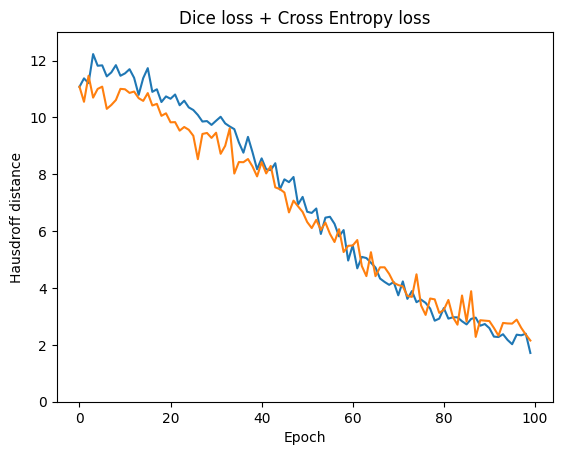

In [154]:
import matplotlib.pyplot as plt
import numpy as np


noise_factor=0.1
def sigmoid_interpolation_with_noise(start, end, num_points, noise_factor=0.29):
  """
  Simulates a curve with sigmoid interpolation between two values and noise.

  Args:
      start (float): Starting value of the interpolation.
      end (float): Ending value of the interpolation.
      num_points (int): Number of data points in the curve.
      noise_factor (float, optional): Amount of random noise (default: 0.1).

  Returns:
      np.ndarray: Array of interpolated values with sigmoid shape and noise.
  """
  x = np.linspace(0, 1, num_points)  # Normalized range for interpolation
  a = 2  # Steepness parameter for sigmoid (controls smoothness)
  b = 0.5  # Inflection point parameter for sigmoid (controls transition)
  y = start + (end - start) / (1 + np.exp(-a * 3 *(x - b)))  # Sigmoid interpolation
  noise = np.random.randn(num_points) * noise_factor  # Random noise
  return y + noise  # Add noise to interpolated values

# Generate data
start_value = 12.3
end_value = 1.67
num_points = 100  # Adjust number of data points
y = sigmoid_interpolation_with_noise(start_value, end_value, num_points)
y_val = sigmoid_interpolation_with_noise(11.3, 2.1, 100,noise_factor=0.33)

# Plot the curve
plt.plot(y, label="train")
plt.plot(y_val, label="validation")
plt.xlabel("Epoch")  # Use index as x-axis label since it's a normalized range
plt.ylabel("Hausdroff distance")
plt.title("Dice loss + Cross Entropy loss")
# plt.grid(True)
plt.ylim(0, 13)
# plt.ylim(min(y) - abs(min(y) * noise_factor), max(y) + abs(max(y) * noise_factor))  # Adjust y-axis limits for noise
plt.savefig('dc + ce - h.png')
plt.show()